In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy
import hydrophone_data_processing.load as load
import hydrophone_data_processing.preprocessing as preprocessing

from multiprocessing import Pool

In [2]:
# days = np.arange(130, 360, 1)
# stds = []
# for day in days:
#     day = load.import_corrected_data_for_single_day(julian_day=day, year=2019, borehole='b')
#     stds.append(day.std())
#     del day
    
# stds = np.array(stds)
# stds[0:5]

In [69]:
# pool = Pool()

days = np.arange(130, 360, 1)

def do(day):
    daydata = load.import_corrected_data_for_single_day(julian_day=day, year=2019, borehole='b')
    daydata.decimate(factor=10)
    daydata.detrend('demean')
    preprocessing.square_stream(daydata)
    daydata.filter(type='lowpass', freq=0.1)
    std = daydata.std()
    del daydata
    # std = std[::-1].append(day)
    # [::-1]
    # return std
    std = std[::-1]
    std.append(day)
    return std[::-1]

# do(day=138)

pool = Pool(15)
stds = pool.map(do, days)
pool.close()

In [70]:
stddf = pd.DataFrame(np.array(stds))

stddf.columns = ['day', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6']
stddf.set_index('day', inplace=True)

<AxesSubplot:xlabel='day'>

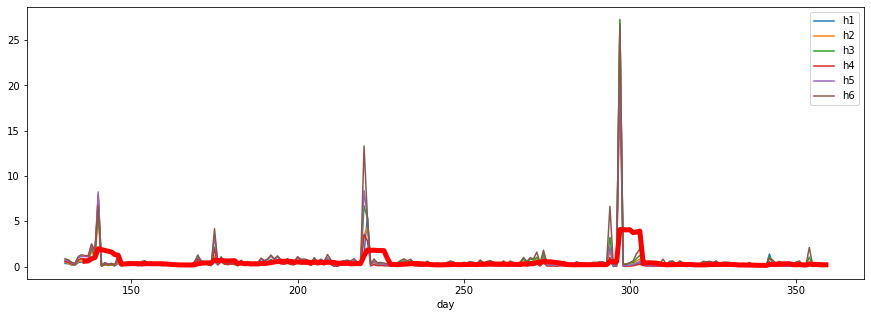

In [71]:
fig, ax = plt.subplots(figsize=(15, 5))
stddf.plot(ax=ax)
stddf.mean(axis=1).rolling(window=7).mean().plot(color='red', linewidth='5', ax=ax)

In [72]:
day285 = load.import_corrected_data_for_single_day(julian_day=285, year=2019, borehole='b')

In [73]:
# day285.integrate()
# day285.std()
quiet_time = day285.slice(starttime=obspy.UTCDateTime('2019-10-12T19:00:00')
               ,endtime=obspy.UTCDateTime('2019-10-12T21:00:00'))
quiet_time.detrend('demean')

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-10-12T19:00:00.000000Z - 2019-10-12T21:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.B00.02.GDH | 2019-10-12T19:00:00.000000Z - 2019-10-12T21:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.B00.03.GDH | 2019-10-12T19:00:00.000000Z - 2019-10-12T21:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.B00.04.GDH | 2019-10-12T19:00:00.000000Z - 2019-10-12T21:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.B00.05.GDH | 2019-10-12T19:00:00.000000Z - 2019-10-12T21:00:00.000000Z | 1000.0 Hz, 7200001 samples
7F.B00.06.GDH | 2019-10-12T19:00:00.000000Z - 2019-10-12T21:00:00.000000Z | 1000.0 Hz, 7200001 samples

In [74]:
noise_std_to_remove = np.array(quiet_time.std())

In [75]:
noise_std_to_remove

array([ 0.03083086,  0.03500093,  0.04194761,  0.02879127,  0.0356557 ,
        0.05058142])

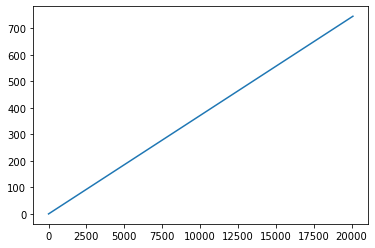

In [76]:
plt.plot(np.cumsum(np.ones([279*(24//2), 6])*noise_std_to_remove))

In [68]:
tremor = obspy.read('/media/sda/data/robdata/tremors/alldata.mseed')

ObsPyMSEEDFilesizeTooLargeError: ObsPy can currently not directly read mini-SEED files that are larger than 2^31 bytes (2048 MiB). To still read it, please read the file in chunks as documented here: https://github.com/obspy/obspy/pull/1419#issuecomment-221582369

In [66]:
stream = obspy.read(filelocs[0])
for f in filelocs[1:]:
    stream = stream + obspy.read(f)

KeyboardInterrupt: 

In [ ]:
stream.merge()